In [38]:
import numpy as np
import seaborn as sns
import pandas as pd

In [30]:

def process_csv(input_path, output_path):
    # Read the original CSV file
    df = pd.read_csv('data/uci/diabetes.csv', header=None, delim_whitespace=True)

    # Rename columns as per the given format
    columns = ['label'] + [f'feature_{i}' for i in range(1, 9)]
    df.columns = columns

    # Update the label column based on the given conditions
    df['label'] = df['label'].map({1: 1, -1: 0})

    # Remove prefixes from feature columns
    for i in range(1, 9):
        df[f'feature_{i}'] = df[f'feature_{i}'].apply(lambda x: float(x.split(':')[1]))
    columns = df.columns.tolist()

    df = df[[col for col in df.columns if col != 'label'] + ['label']]
    df.to_csv(output_path, index=False)

# Example usage
input_file_path = 'data/uci/diabetes.csv'
output_file_path = 'data/uci/diabetes_new.csv'
process_csv(input_file_path, output_file_path)


In [39]:
def fill_triangular(L, D_in):
    lower_indices = np.tril_indices(D_in)
    l_matrix = np.zeros((D_in, D_in), dtype=L.dtype)
    l_matrix[lower_indices] = L
    return l_matrix

0.3784783043926764
0.3708955112000236
0.37554681067897866


FileNotFoundError: [Errno 2] No such file or directory: 'results/run-0015/kernel/kernel_samples_fold_3.npz'

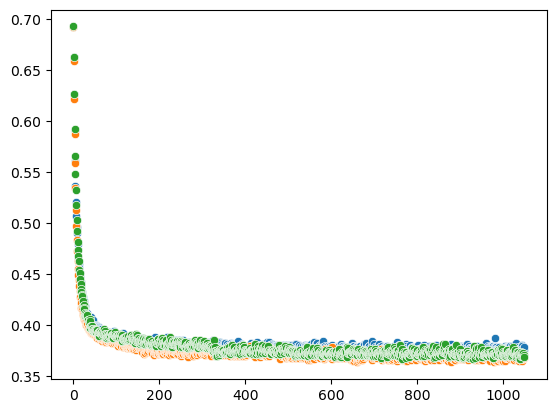

In [40]:
test_mnll_folds = []
for k in range(5):
    kernel_data = np.load(f'results/run-0015/kernel/kernel_samples_fold_{k}.npz')
    print(kernel_data['test_mnll'])
    test_mnll_folds.append(kernel_data['test_mnll'])
    ll_iter = kernel_data['test_mnll_iter']
    n_iters = ll_iter.shape[0]
    sns.scatterplot(x=np.arange(n_iters), y=ll_iter)
    #print('Params saved: ', list(kernel_data.keys()))
print(np.array(test_mnll_folds).mean())

In [41]:
D = kernel_data['D']
num_samples = kernel_data['kern.L'].shape[0]
precision_samples = np.empty((num_samples, D, D)) # S x D x D
for s in  range(num_samples):
    L =  fill_triangular(kernel_data['kern.L'][s], D) 
    precision = L @ L.T
    precision_samples[s] = precision
precision_mean = np.mean(precision_samples, axis=0) # D x D
precision_std = np.std(precision_samples, axis=0) # D x D

<AxesSubplot:>

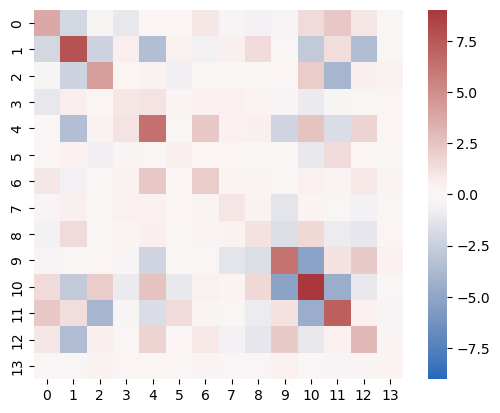

In [42]:
sns.heatmap(precision_mean, cmap='vlag', vmin=-np.max(precision), center=0, vmax=np.max(precision), square=True)